In [1]:
import os
import tweepy as tw
import pandas as pd
import seaborn as sns
import itertools
import collections
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from textblob import TextBlob, Word, Blobber
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


import spacy
nlp = spacy.load('en')
from nltk.stem import PorterStemmer 


In [ ]:
consumer_key= 'Eb1DdBNmC1qJobA7c3afPEpB2'
consumer_secret= 'AG6rWw3PYkSpmZqysnzoV8OKsp0rSt8otV77TrxaM72IyrFG3y'
access_token= '1321077472209895425-a8hjI7Pwq3N6APUJnrBrDCLhslbwAz'
access_token_secret= 'e7OMeODgbi1SXlH3JVzrVcrUz0DqGY5tzrdrTaczhL0kl'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Attriubtes
User.screen_name: username of tweet's author

User.description: Text in user bio

Created_at: Date tweet was created (date_time)

User.followers_count: count of followers users have

User.location:location which is mention on user profile(User bio)

id_str:id of tweet

tweet.text:text of tweet

favourite_count:count of favourites(likes on tweet)

Hashtags:Hashtags that tweets contain

Retweet_count:count of retweet

source:Source where tweet was posted through

is_quote_status:if tweet is quote tweet(boolean value)

language:language of tweet

friends_count:count of other user that user is following



In [ ]:
from time import sleep
#Extracting Tweets
new_search = "iphone12 -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   mode="extended").items(5000)

results = []
for tweet in tweets:
     results.append(tweet)


In [ ]:
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    dataframe = pd.DataFrame(id_list, columns = ["tweet_id"])
    
    dataframe['Username'] = [tweet.user.screen_name for tweet in results]
    dataframe['User_description'] = [tweet.user.description for tweet in results]
    dataframe["User_followers"] = [tweet.user.followers_count for tweet in results]
    dataframe["User_following"] = [tweet.user.friends_count for tweet in results]
    dataframe["User_location"] = [tweet.user.location for tweet in results]
    dataframe["Date_Time"] = [tweet.created_at for tweet in results]
    dataframe["tweet"] = [tweet.text for tweet in results]
    dataframe["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
    dataframe["Likes"] = [tweet.favorite_count for tweet in results]
    dataframe["Retweet_count"] = [tweet.retweet_count for tweet in results]
    dataframe["source"] = [tweet.source for tweet in results]
    dataframe["tweet_place"] = [tweet.place for tweet in results]
    dataframe["tweet_is_quote_status"] = [tweet.is_quote_status for tweet in results]
    dataframe["tweet_language"] = [tweet.lang for tweet in results]
    dataframe["tweet_coordinates"] = [tweet.coordinates for tweet in results]
    
    return dataframe

dataframe = tweets_df(results)

dataframe.shape

In [ ]:
#https://stackoverflow.com/questions/44700371/how-to-extract-only-texts-in-hashtag-using-tweepy
ht=[]
for s in range(len(dataframe['Hashtags'])):
    hasht=[]
    for t in range(len(dataframe.Hashtags[s])):
        hasht.append(dataframe['Hashtags'][s][t]['text'])
        t=t+1
    ht.append(hasht)
    s=s+1

In [ ]:
dataframe['Hashtags']=ht

In [ ]:
dataframe.head()

In [2]:
a=pd.read_csv("iphone_analysis.csv")
b=pd.read_csv("iphoneanalysis_7000_1.csv")
c=pd.read_csv("iphoneanalysis_7000_2.csv")
d=pd.read_csv("iphoneanalysis_7000_3.csv")
e=pd.read_csv("iphoneanalysis_7000_4.csv")
f=pd.read_csv("iphoneanalysis_7000_5.csv")
g=pd.read_csv("iphoneanalysis_7000_6.csv")
h=pd.read_csv("iphoneanalysis_7000_7.csv")
dataframe = pd.concat([a,b,c,d,e,f,g,h])

In [3]:
dataframe.head()

tweet_id         Username  \
0  1323734034086723585   payetteforward   
1  1323733110773719048         Nuacloud   
2  1323732826546671618          ghayur7   
3  1323732460639821826          Cohimma   
4  1323731391381688325  korkmazmehmet69   

                                    User_description  User_followers  \
0  Payette Forward helps millions of people solve...            1042   
1  💫✨I game a lot, hike a lot, and watch anime. 💕...              51   
2  #ccna #cisco \n#enginer #fiberoptique #Telecom...              69   
3  Professional MMA fighter under @DanielGracie a...             271   
4  Eğlence ve Mizah Gündem Siyaset Ekonomi ve Fin...             548   

   User_following      User_location            Date_Time  \
0             236   Clifton Park, NY  2020-11-03 21:09:22   
1             273  Bowling Green, KY  2020-11-03 21:05:42   
2             581       Metz, France  2020-11-03 21:04:34   
3             238   Philadelphia, PA  2020-11-03 21:03:07   
4            1329   ANTALYA, Türkiye  2020-11-03 20:58:52   

                                               tweet  \
0  Check out our #Youtube channel! We just upload...   
1  I am so obsessed. #iPhone12 https://t.co/7g0or...   
2          Iphone12 ❤️❤️❤️❤️ https://t.co/0NUXV1GhbO   
3  I love my #iphone12 and I’m glad I’m finally o...   
4  @Akpartiarabic @MhpTbmmGrubu @devapartisi @Gel...   

                                            Hashtags  Likes  Retweet_count  \
0                            ['Youtube', 'iphone12']      0              1   
1                                       ['iPhone12']      0              0   
2                                                 []      0              0   
3                     ['iphone12', 'ATT', 'Apple12']      0              0   
4  ['aydabebek', 'Ayda', 'depremvergilerinerede',...      0              0   

               source                                        tweet_place  \
0  Twitter for iPhone                                                NaN   
1  Twitter for iPhone                                                NaN   
2  Twitter for iPhone                                                NaN   
3  Twitter for iPhone  Place(_api=<tweepy.api.API object at 0x10ddb65...   
4     Twitter Web App                                                NaN   

   tweet_is_quote_status tweet_language tweet_coordinates  
0                  False             en               NaN  
1                  False             en               NaN  
2                  False             en               NaN  
3                  False             en               NaN  
4                   True             en               NaN

In [4]:
dataframe.shape

(46799, 16)

In [5]:
#After removing duplicate tweets
dataframe = dataframe.drop_duplicates()
print('After removing duplicates Number of data points : ', dataframe.shape[0])
print('Number of features : ', dataframe.shape[1])
print('Features : ', dataframe.columns.values)
dataframe.head()

After removing duplicates Number of data points :  20085
Number of features :  16
Features :  ['tweet_id' 'Username' 'User_description' 'User_followers'
 'User_following' 'User_location' 'Date_Time' 'tweet' 'Hashtags' 'Likes'
 'Retweet_count' 'source' 'tweet_place' 'tweet_is_quote_status'
 'tweet_language' 'tweet_coordinates']


tweet_id         Username  \
0  1323734034086723585   payetteforward   
1  1323733110773719048         Nuacloud   
2  1323732826546671618          ghayur7   
3  1323732460639821826          Cohimma   
4  1323731391381688325  korkmazmehmet69   

                                    User_description  User_followers  \
0  Payette Forward helps millions of people solve...            1042   
1  💫✨I game a lot, hike a lot, and watch anime. 💕...              51   
2  #ccna #cisco \n#enginer #fiberoptique #Telecom...              69   
3  Professional MMA fighter under @DanielGracie a...             271   
4  Eğlence ve Mizah Gündem Siyaset Ekonomi ve Fin...             548   

   User_following      User_location            Date_Time  \
0             236   Clifton Park, NY  2020-11-03 21:09:22   
1             273  Bowling Green, KY  2020-11-03 21:05:42   
2             581       Metz, France  2020-11-03 21:04:34   
3             238   Philadelphia, PA  2020-11-03 21:03:07   
4            1329   ANTALYA, Türkiye  2020-11-03 20:58:52   

                                               tweet  \
0  Check out our #Youtube channel! We just upload...   
1  I am so obsessed. #iPhone12 https://t.co/7g0or...   
2          Iphone12 ❤️❤️❤️❤️ https://t.co/0NUXV1GhbO   
3  I love my #iphone12 and I’m glad I’m finally o...   
4  @Akpartiarabic @MhpTbmmGrubu @devapartisi @Gel...   

                                            Hashtags  Likes  Retweet_count  \
0                            ['Youtube', 'iphone12']      0              1   
1                                       ['iPhone12']      0              0   
2                                                 []      0              0   
3                     ['iphone12', 'ATT', 'Apple12']      0              0   
4  ['aydabebek', 'Ayda', 'depremvergilerinerede',...      0              0   

               source                                        tweet_place  \
0  Twitter for iPhone                                                NaN   
1  Twitter for iPhone                                                NaN   
2  Twitter for iPhone                                                NaN   
3  Twitter for iPhone  Place(_api=<tweepy.api.API object at 0x10ddb65...   
4     Twitter Web App                                                NaN   

   tweet_is_quote_status tweet_language tweet_coordinates  
0                  False             en               NaN  
1                  False             en               NaN  
2                  False             en               NaN  
3                  False             en               NaN  
4                   True             en               NaN

# Analysis of number of followers per users

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

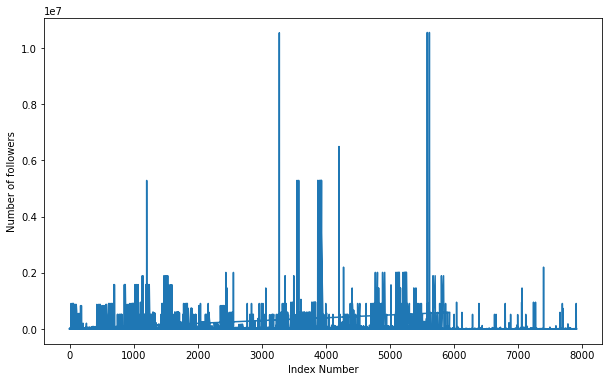

In [7]:
plt.figure(figsize=(10,6))
plt.plot(dataframe['User_followers'])
plt.xlabel("Index Number")
plt.ylabel("Number of followers")
plt.show()

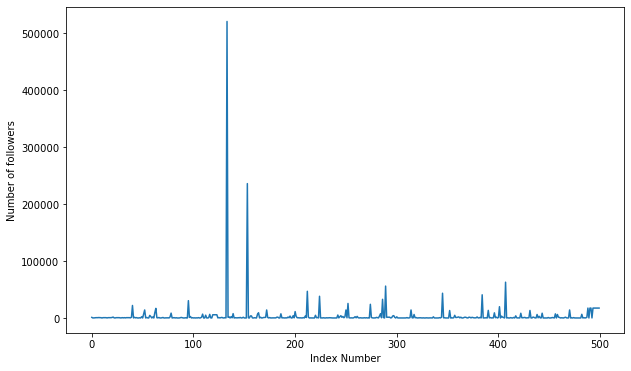

In [8]:
#look only 500 users 
plt.figure(figsize=(10,6))
plt.plot(dataframe['User_followers'][0:500])
plt.xlabel("Index Number")
plt.ylabel("Number of followers")
plt.show()

Anlaysis using Box plot for Number of followers

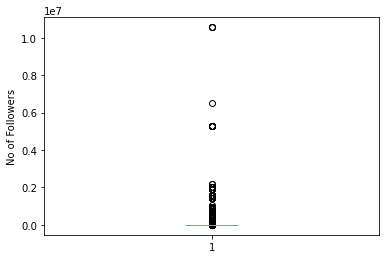

In [9]:
plt.boxplot(dataframe['User_followers'])
plt.ylabel("No of Followers")
plt.show()

In [10]:
### 90-100 percentile
for i in range(0,11):
    print(90+i, 'percentile value is', np.percentile(dataframe['User_followers'], 90+i))


90 percentile value is 15909.800000000007
91 percentile value is 18170.440000000002
92 percentile value is 21631.0
93 percentile value is 25688.0
94 percentile value is 29175.96
95 percentile value is 38113.8
96 percentile value is 55662.19999999962
97 percentile value is 96904.92
98 percentile value is 508032.83999999816
99 percentile value is 605976.3200000001
100 percentile value is 10557745.0


90% users having 15909 followers or fewer followers

# Analysis number of following per users

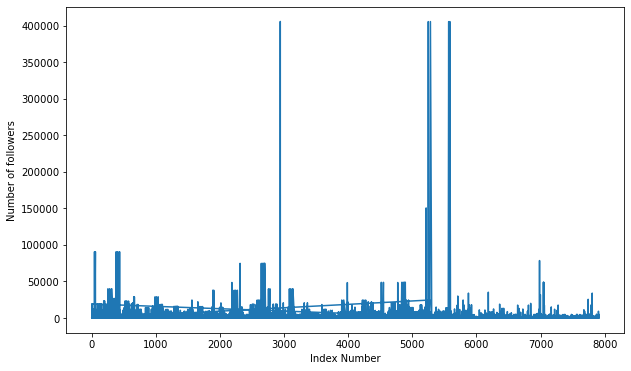

In [11]:
plt.figure(figsize=(10,6))
plt.plot(dataframe['User_following'])
plt.xlabel("Index Number")
plt.ylabel("Number of followers")
plt.show()

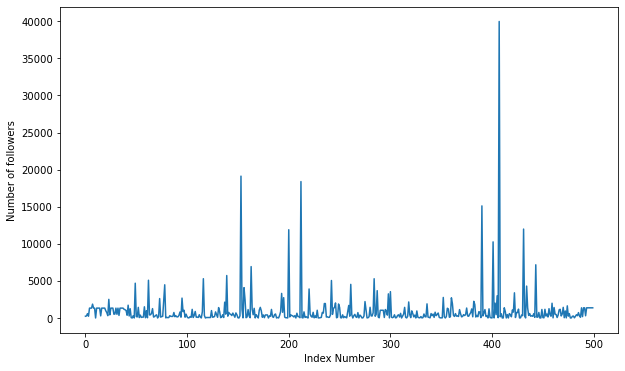

In [12]:
plt.figure(figsize=(10,6))
plt.plot(dataframe['User_following'][0:500])
plt.xlabel("Index Number")
plt.ylabel("Number of followers")
plt.show()

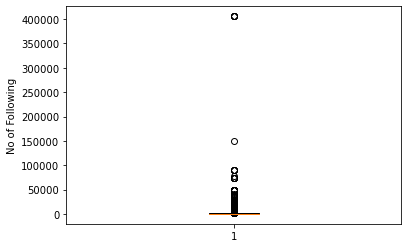

In [13]:
plt.boxplot(dataframe['User_following'])
plt.ylabel("No of Following")
plt.show()

In [14]:
###90-100 percentile
for i in range(0,11):
    print(90+i, 'percentile value is', np.percentile(dataframe['User_following'], 90+i))


90 percentile value is 2707.600000000046
91 percentile value is 3066.0
92 percentile value is 3359.0
93 percentile value is 3572.1200000000026
94 percentile value is 4095.9199999999983
95 percentile value is 4733.399999999998
96 percentile value is 5044.0
97 percentile value is 7019.0
98 percentile value is 9202.0
99 percentile value is 12357.48
100 percentile value is 405977.0


90% users are having 2707 or fewer followings

# Analysis of Source attribute

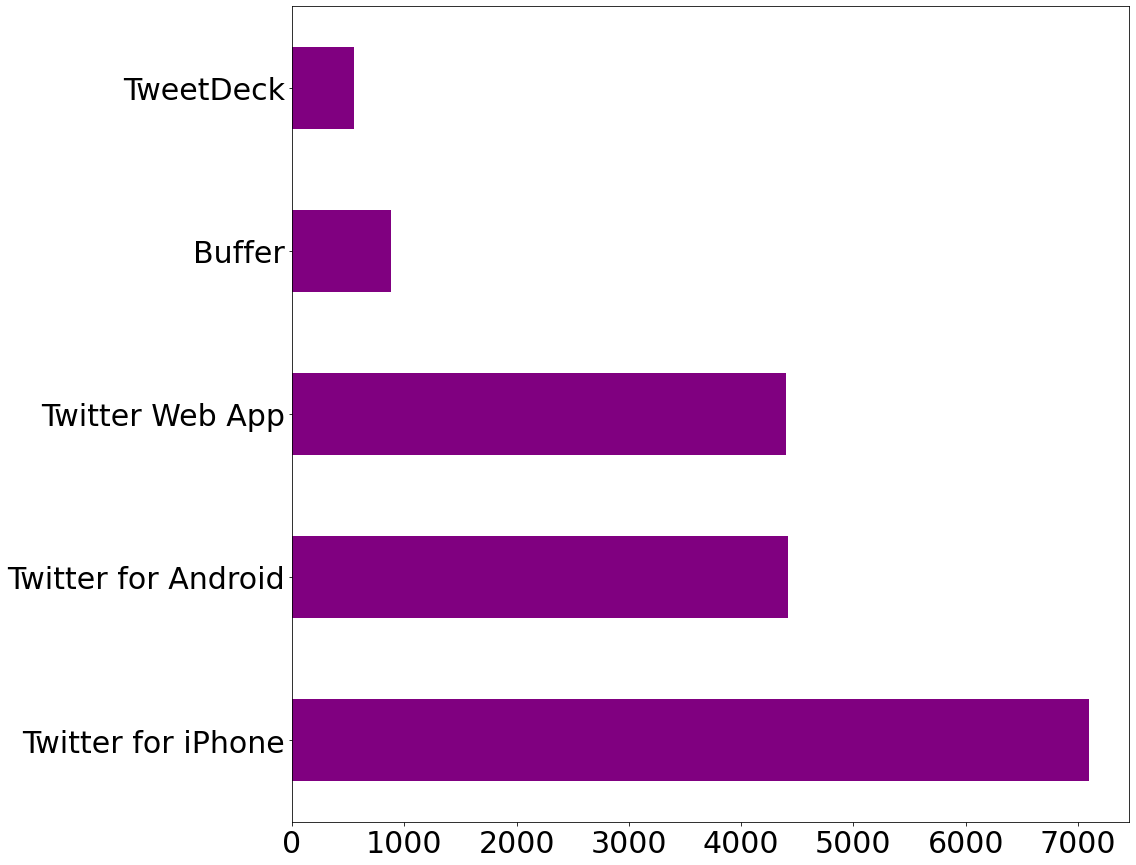

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)
dataframe['source'].value_counts()[:5].plot(kind='barh',color="purple",ax=ax)


Most of the tweets were posted through Twitter for iphone

# Analysis of whether tweet_is_quote_status or not

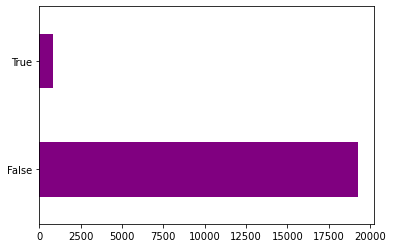

In [16]:
dataframe['tweet_is_quote_status'].value_counts().plot(kind='barh', color="purple")

# Common words of tweet before removing stopwords

In [17]:
words_in_tweet = [tweet.split() for tweet in dataframe['tweet']]
words_in_tweet

[['Check',
  'out',
  'our',
  '#Youtube',
  'channel!',
  'We',
  'just',
  'uploaded',
  'a',
  'new',
  '#iphone12',
  'video',
  'and',
  'we',
  'plan',
  'to',
  'have',
  'a',
  'new',
  'video',
  'up',
  'every',
  'day…',
  'https://t.co/8uXVhCRQjt'],
 ['I', 'am', 'so', 'obsessed.', '#iPhone12', 'https://t.co/7g0orjxyTd'],
 ['Iphone12', '❤️❤️❤️❤️', 'https://t.co/0NUXV1GhbO'],
 ['I',
  'love',
  'my',
  '#iphone12',
  'and',
  'I’m',
  'glad',
  'I’m',
  'finally',
  'on',
  '#ATT',
  'lol',
  '#Apple12'],
 ['@Akpartiarabic',
  '@MhpTbmmGrubu',
  '@devapartisi',
  '@GelecekPartiTR',
  '#aydabebek',
  '#Ayda',
  '#depremvergilerinerede',
  '#fidangezgin…',
  'https://t.co/w9JavJEaat'],
 ['@Akpartiarabic',
  '@MhpTbmmGrubu',
  '@devapartisi',
  '@GelecekPartiTR',
  '#aydabebek',
  '#Ayda',
  '#depremvergilerinerede',
  '#fidangezgin…',
  'https://t.co/HjfG3Lr0n1'],
 ['@Akpartiarabic',
  '@MhpTbmmGrubu',
  '@devapartisi',
  '@GelecekPartiTR',
  '#aydabebek',
  '#Ayda',
  '#deprem

In [18]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(100)

[('the', 7866),
 ('#iPhone12', 6171),
 ('iPhone', 5345),
 ('to', 4695),
 ('for', 4499),
 ('12', 4483),
 ('and', 4245),
 ('is', 3255),
 ('a', 2851),
 ('I', 2663),
 ('on', 2493),
 ('iPhone12', 2348),
 ('you', 2310),
 ('in', 2187),
 ('of', 2124),
 ('this', 2052),
 ('new', 2048),
 ('with', 1825),
 ('your', 1809),
 ('an', 1661),
 ('Pro', 1547),
 ('my', 1531),
 ('iphone12', 1464),
 ('#iphone12', 1340),
 ('Apple', 1317),
 ('#Apple', 1298),
 ('it', 1120),
 ('be', 1093),
 ('The', 1073),
 ('#iPhone12Pro', 967),
 ('have', 921),
 ('from', 894),
 ('are', 877),
 ('will', 870),
 ('get', 863),
 ('-', 852),
 ('&amp;', 845),
 ('that', 838),
 ('me', 817),
 ('at', 804),
 ('@Apple', 769),
 ('now', 713),
 ('can', 708),
 ('#iPhone', 677),
 ('or', 672),
 ('win', 654),
 ('all', 652),
 ('New', 651),
 ('not', 618),
 ('#apple', 601),
 ('.', 581),
 ('phone', 576),
 ('buy', 568),
 ('out', 563),
 ('but', 563),
 ('Max', 536),
 ('by', 534),
 ('like', 494),
 ('@TechnicalGuruji', 490),
 ('Shop', 482),
 ('just', 480),
 (

In [19]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

words  count
0        the   7866
1  #iPhone12   6171
2     iPhone   5345
3         to   4695
4        for   4499

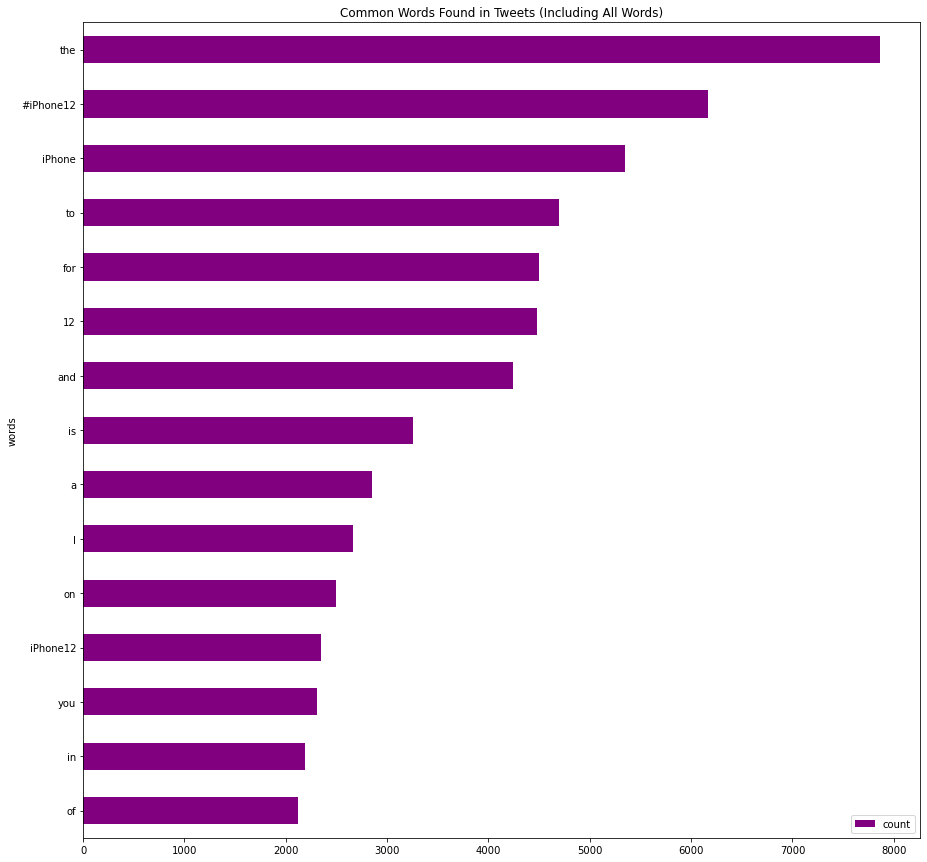

In [20]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
fig, ax = plt.subplots(figsize=(15, 15))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

# After removing stopwords count Common Words Found in Tweets

In [21]:
dataframe.head()

tweet_id         Username  \
0  1323734034086723585   payetteforward   
1  1323733110773719048         Nuacloud   
2  1323732826546671618          ghayur7   
3  1323732460639821826          Cohimma   
4  1323731391381688325  korkmazmehmet69   

                                    User_description  User_followers  \
0  Payette Forward helps millions of people solve...            1042   
1  💫✨I game a lot, hike a lot, and watch anime. 💕...              51   
2  #ccna #cisco \n#enginer #fiberoptique #Telecom...              69   
3  Professional MMA fighter under @DanielGracie a...             271   
4  Eğlence ve Mizah Gündem Siyaset Ekonomi ve Fin...             548   

   User_following      User_location            Date_Time  \
0             236   Clifton Park, NY  2020-11-03 21:09:22   
1             273  Bowling Green, KY  2020-11-03 21:05:42   
2             581       Metz, France  2020-11-03 21:04:34   
3             238   Philadelphia, PA  2020-11-03 21:03:07   
4            1329   ANTALYA, Türkiye  2020-11-03 20:58:52   

                                               tweet  \
0  Check out our #Youtube channel! We just upload...   
1  I am so obsessed. #iPhone12 https://t.co/7g0or...   
2          Iphone12 ❤️❤️❤️❤️ https://t.co/0NUXV1GhbO   
3  I love my #iphone12 and I’m glad I’m finally o...   
4  @Akpartiarabic @MhpTbmmGrubu @devapartisi @Gel...   

                                            Hashtags  Likes  Retweet_count  \
0                            ['Youtube', 'iphone12']      0              1   
1                                       ['iPhone12']      0              0   
2                                                 []      0              0   
3                     ['iphone12', 'ATT', 'Apple12']      0              0   
4  ['aydabebek', 'Ayda', 'depremvergilerinerede',...      0              0   

               source                                        tweet_place  \
0  Twitter for iPhone                                                NaN   
1  Twitter for iPhone                                                NaN   
2  Twitter for iPhone                                                NaN   
3  Twitter for iPhone  Place(_api=<tweepy.api.API object at 0x10ddb65...   
4     Twitter Web App                                                NaN   

   tweet_is_quote_status tweet_language tweet_coordinates  
0                  False             en               NaN  
1                  False             en               NaN  
2                  False             en               NaN  
3                  False             en               NaN  
4                   True             en               NaN

In [22]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","iphone","iphone12","iphone12 iphone12pro","apple iphone12","apple","iphone iphone12","iphone12pro iphone12mini iphone12,appleevent"])


In [23]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [24]:

from tqdm import tqdm
preprocessed_tweet = []
# tqdm is for printing the status bar
for sentence in tqdm(dataframe['tweet'].values):
    sentence = re.sub(r"http\S+", "", sentence) # remove urls from text python: https://stackoverflow.com/a/40823105/4084039
    sentence = BeautifulSoup(sentence, 'lxml').get_text() 
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip() #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)  #remove spacial character: https://stackoverflow.com/a/5843547/4084039
    # https://gist.github.com/sebleier/554280
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_tweet.append(sentence.strip())

100%|██████████| 20085/20085 [00:05<00:00, 3499.86it/s]


In [25]:
dataframe['preprocessed_tweet'] = preprocessed_tweet   

In [26]:
dataframe.head()

tweet_id         Username  \
0  1323734034086723585   payetteforward   
1  1323733110773719048         Nuacloud   
2  1323732826546671618          ghayur7   
3  1323732460639821826          Cohimma   
4  1323731391381688325  korkmazmehmet69   

                                    User_description  User_followers  \
0  Payette Forward helps millions of people solve...            1042   
1  💫✨I game a lot, hike a lot, and watch anime. 💕...              51   
2  #ccna #cisco \n#enginer #fiberoptique #Telecom...              69   
3  Professional MMA fighter under @DanielGracie a...             271   
4  Eğlence ve Mizah Gündem Siyaset Ekonomi ve Fin...             548   

   User_following      User_location            Date_Time  \
0             236   Clifton Park, NY  2020-11-03 21:09:22   
1             273  Bowling Green, KY  2020-11-03 21:05:42   
2             581       Metz, France  2020-11-03 21:04:34   
3             238   Philadelphia, PA  2020-11-03 21:03:07   
4            1329   ANTALYA, Türkiye  2020-11-03 20:58:52   

                                               tweet  \
0  Check out our #Youtube channel! We just upload...   
1  I am so obsessed. #iPhone12 https://t.co/7g0or...   
2          Iphone12 ❤️❤️❤️❤️ https://t.co/0NUXV1GhbO   
3  I love my #iphone12 and I’m glad I’m finally o...   
4  @Akpartiarabic @MhpTbmmGrubu @devapartisi @Gel...   

                                            Hashtags  Likes  Retweet_count  \
0                            ['Youtube', 'iphone12']      0              1   
1                                       ['iPhone12']      0              0   
2                                                 []      0              0   
3                     ['iphone12', 'ATT', 'Apple12']      0              0   
4  ['aydabebek', 'Ayda', 'depremvergilerinerede',...      0              0   

               source                                        tweet_place  \
0  Twitter for iPhone                                                NaN   
1  Twitter for iPhone                                                NaN   
2  Twitter for iPhone                                                NaN   
3  Twitter for iPhone  Place(_api=<tweepy.api.API object at 0x10ddb65...   
4     Twitter Web App                                                NaN   

   tweet_is_quote_status tweet_language tweet_coordinates  \
0                  False             en               NaN   
1                  False             en               NaN   
2                  False             en               NaN   
3                  False             en               NaN   
4                   True             en               NaN   

                                  preprocessed_tweet  
0  check youtube channel uploaded new video plan ...  
1                                           obsessed  
2                                                     
3                          love glad finally att lol  
4  akpartiarabic mhptbmmgrubu devapartisi gelecek...

In [27]:
words_in_tweet = [tweet.split() for tweet in preprocessed_tweet]
words_in_tweet

[['check',
  'youtube',
  'channel',
  'uploaded',
  'new',
  'video',
  'plan',
  'new',
  'video',
  'every',
  'day'],
 ['obsessed'],
 [],
 ['love', 'glad', 'finally', 'att', 'lol'],
 ['akpartiarabic',
  'mhptbmmgrubu',
  'devapartisi',
  'gelecekpartitr',
  'aydabebek',
  'ayda',
  'depremvergilerinerede',
  'fidangezgin'],
 ['akpartiarabic',
  'mhptbmmgrubu',
  'devapartisi',
  'gelecekpartitr',
  'aydabebek',
  'ayda',
  'depremvergilerinerede',
  'fidangezgin'],
 ['akpartiarabic',
  'mhptbmmgrubu',
  'devapartisi',
  'gelecekpartitr',
  'aydabebek',
  'ayda',
  'depremvergilerinerede',
  'fidangezgin'],
 ['supcase',
  'atl',
  'giving',
  'away',
  'could',
  'tweet',
  'wins',
  'enter',
  'everyday',
  'increase',
  'chan'],
 ['akpartiarabic',
  'mhptbmmgrubu',
  'devapartisi',
  'gelecekpartitr',
  'aydabebek',
  'ayda',
  'depremvergilerinerede',
  'fidangezgin'],
 ['akpartiarabic',
  'mhptbmmgrubu',
  'devapartisi',
  'gelecekpartitr',
  'aydabebek',
  'ayda',
  'depremverg

In [28]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(100)

[('new', 3001),
 ('pro', 2537),
 ('get', 1469),
 ('not', 1179),
 ('phone', 943),
 ('max', 876),
 ('mini', 816),
 ('win', 807),
 ('buy', 744),
 ('price', 730),
 ('shop', 705),
 ('like', 673),
 ('case', 661),
 ('series', 588),
 ('one', 588),
 ('giveaway', 584),
 ('technicalguruji', 569),
 ('available', 524),
 ('glass', 522),
 ('charger', 491),
 ('via', 490),
 ('time', 489),
 ('video', 487),
 ('ios', 476),
 ('no', 473),
 ('magsafe', 472),
 ('found', 471),
 ('review', 471),
 ('appleevent', 469),
 ('endless', 466),
 ('best', 461),
 ('fantastic', 451),
 ('camera', 448),
 ('slash', 447),
 ('bargain', 446),
 ('wonders', 445),
 ('screen', 432),
 ('want', 425),
 ('first', 414),
 ('pre', 413),
 ('free', 412),
 ('could', 394),
 ('got', 393),
 ('enter', 377),
 ('away', 375),
 ('youtube', 369),
 ('order', 369),
 ('blue', 349),
 ('check', 348),
 ('follow', 348),
 ('go', 343),
 ('need', 342),
 ('protector', 339),
 ('giving', 336),
 ('tweet', 333),
 ('brand', 329),
 ('please', 328),
 ('us', 324),
 ('to

In [29]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(50),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

words  count
0    new   3001
1    pro   2537
2    get   1469
3    not   1179
4  phone    943

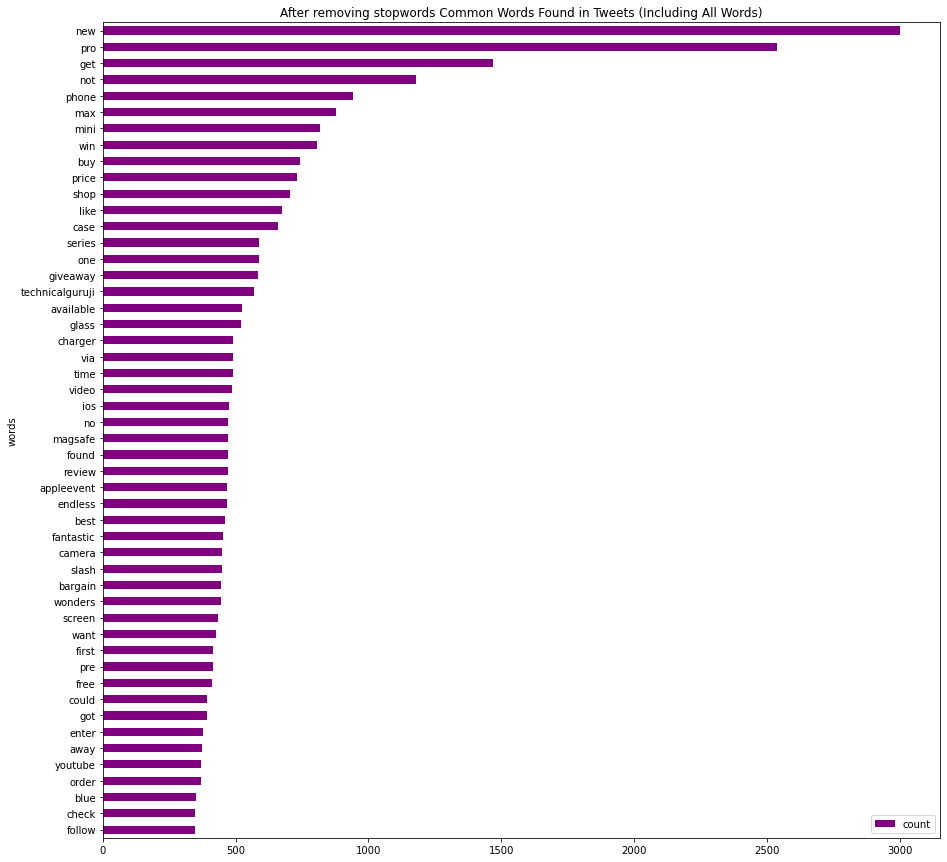

In [30]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
fig, ax = plt.subplots(figsize=(15, 15))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("After removing stopwords Common Words Found in Tweets (Including All Words)")

plt.show()


In [31]:
stopwords_update= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","iphone","iphone12","iphone12 iphone12pro","apple iphone12","apple","iphone iphone12","iphone12pro iphone12mini iphone12,appleevent", "apple event"])



In [32]:

from tqdm import tqdm
preprocessed_hashtags = []
# tqdm is for printing the status bar
for sentence in tqdm(dataframe['Hashtags'].values):
    sentence = re.sub(r"http\S+", "", sentence) # remove urls from text python: https://stackoverflow.com/a/40823105/4084039
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip() #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)  #remove spacial character: https://stackoverflow.com/a/5843547/4084039
    # https://gist.github.com/sebleier/554280
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords_update)
    preprocessed_hashtags.append(sentence.strip())

100%|██████████| 20085/20085 [00:00<00:00, 54863.26it/s]


In [33]:
ht_string=str(preprocessed_hashtags)

In [34]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

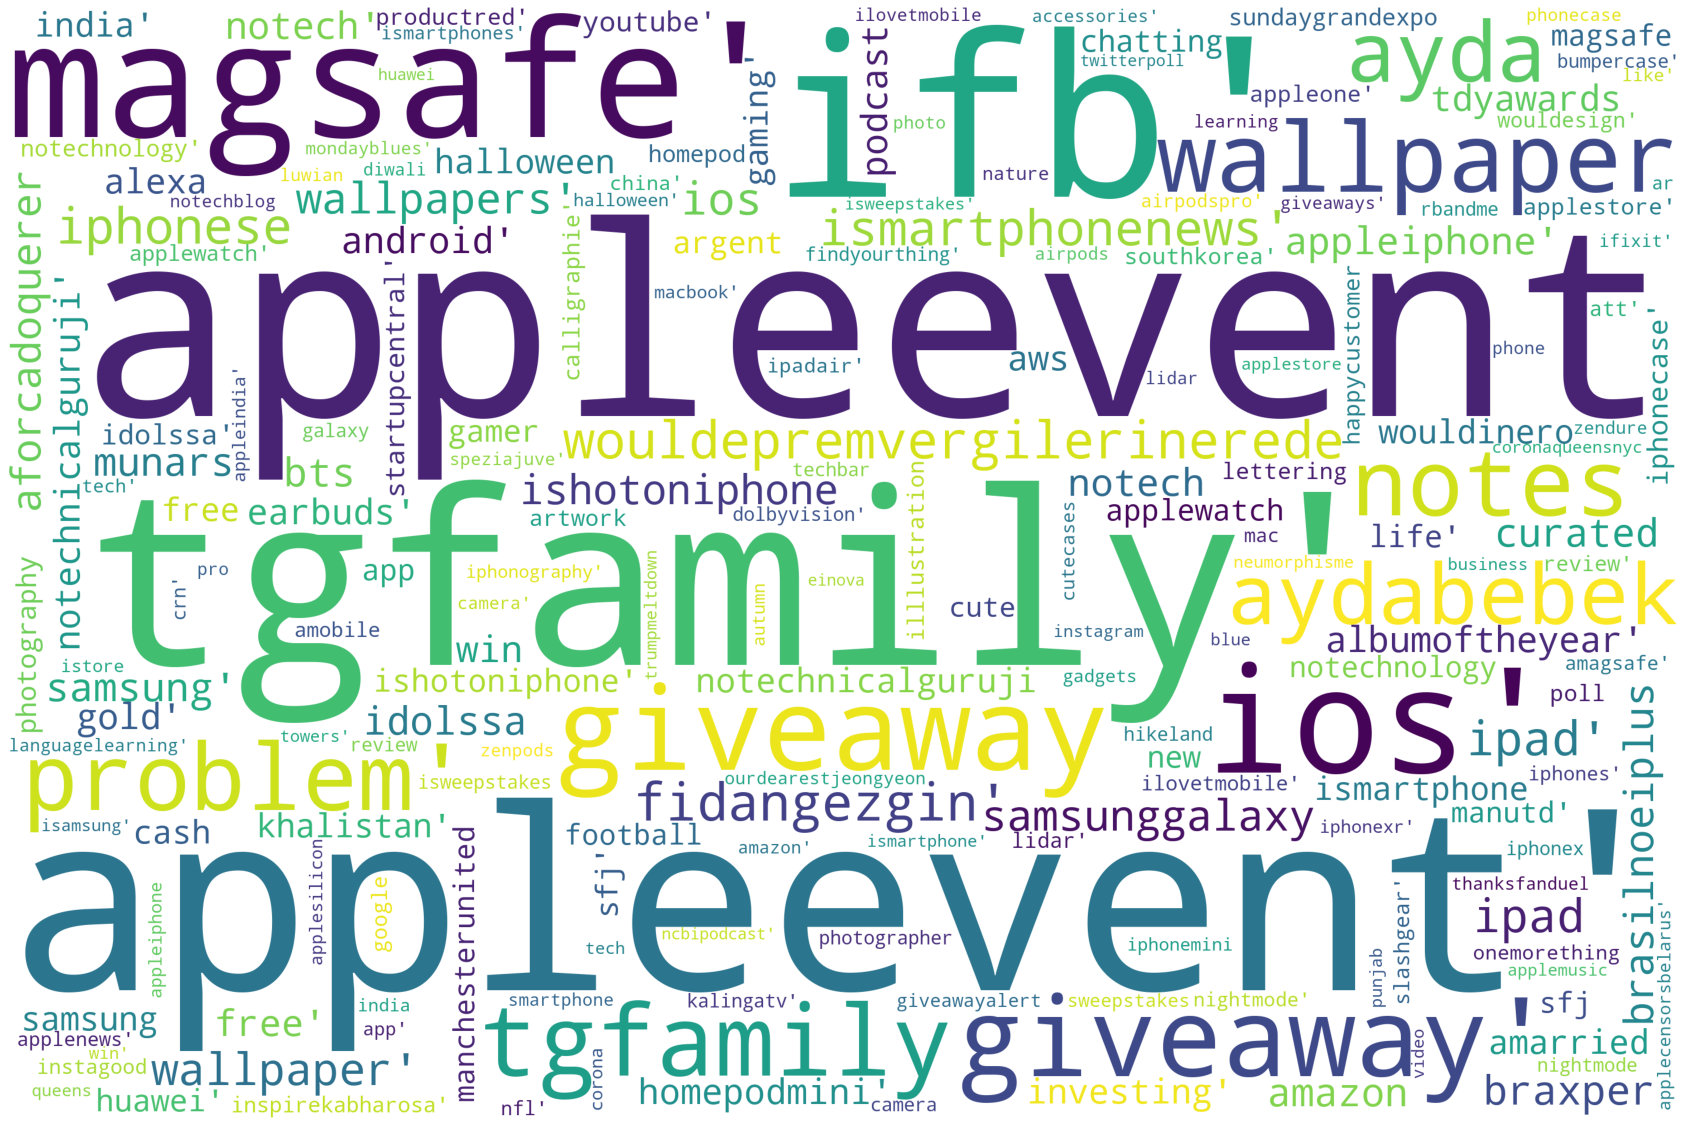

In [35]:
#Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="white" ,collocations=False, stopwords = STOPWORDS).generate(ht_string)
# Plot
plot_cloud(wordcloud)
wordcloud.to_file('/Users/shreshthrathod/Downloads/WC_1.png')

Sentiment Analysis with TextBlob

The sentiment property returns a named-tuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [36]:
from textblob import TextBlob 

def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment


In [37]:
dataframe['sentiment']=dataframe['preprocessed_tweet'].apply(get_sentiment)

In [38]:
dataframe['polarity'] = dataframe['preprocessed_tweet'].map(lambda text: TextBlob(text).sentiment.polarity)
dataframe['subjectivity'] = dataframe['preprocessed_tweet'].map(lambda text: TextBlob(text).sentiment.subjectivity)

In [39]:
#https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
dataframe['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='black',
    yTitle='Count',
    title='Sentiment Polarity Distribution')

Vast majority of the sentiment polarity scores are neutral.but some of tweets are more greater than 0 that means postive also

# Plot distribution of tweet length

In [40]:
#how many character in tweet=tweet_length
dataframe['tweet_length'] = dataframe['preprocessed_tweet'].astype(str).apply(len)

In [41]:
dataframe['tweet_length'].iplot(
    kind='hist',
    bins=100,
    xTitle='Tweet Length',
    linecolor='black',
    yTitle='Count',
    title='Tweet Text Length Distribution')

# Plot distribution for word count of tweets

In [42]:
dataframe['Tweet_word_count'] = dataframe['preprocessed_tweet'].apply(lambda x: len(str(x).split()))

In [43]:
dataframe['Tweet_word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Tweet Word Count length',
    linecolor='black',
    yTitle='Count',
    title='Tweet Word Count Distribution')

# Compare tweets from different sources 

In [44]:
iphone_tweets = dataframe[(dataframe.source == "Twitter for iPhone")]

In [45]:
iphone_tweets.shape

(7099, 22)

In [46]:
iphone_tweets.head()

tweet_id        Username  \
0   1323734034086723585  payetteforward   
1   1323733110773719048        Nuacloud   
2   1323732826546671618         ghayur7   
3   1323732460639821826         Cohimma   
33  1323723717583630336  Unfucxwittable   

                                     User_description  User_followers  \
0   Payette Forward helps millions of people solve...            1042   
1   💫✨I game a lot, hike a lot, and watch anime. 💕...              51   
2   #ccna #cisco \n#enginer #fiberoptique #Telecom...              69   
3   Professional MMA fighter under @DanielGracie a...             271   
33                             #RIPKOBE #GOAT #CudFam             171   

    User_following      User_location            Date_Time  \
0              236   Clifton Park, NY  2020-11-03 21:09:22   
1              273  Bowling Green, KY  2020-11-03 21:05:42   
2              581       Metz, France  2020-11-03 21:04:34   
3              238   Philadelphia, PA  2020-11-03 21:03:07   
33             345               Hilo  2020-11-03 20:28:22   

                                                tweet  \
0   Check out our #Youtube channel! We just upload...   
1   I am so obsessed. #iPhone12 https://t.co/7g0or...   
2           Iphone12 ❤️❤️❤️❤️ https://t.co/0NUXV1GhbO   
3   I love my #iphone12 and I’m glad I’m finally o...   
33  Anyone with an IPhone 12 that is having issues...   

                          Hashtags  Likes  ...  \
0          ['Youtube', 'iphone12']      0  ...   
1                     ['iPhone12']      0  ...   
2                               []      0  ...   
3   ['iphone12', 'ATT', 'Apple12']      0  ...   
33                              []      0  ...   

                                          tweet_place tweet_is_quote_status  \
0                                                 NaN                 False   
1                                                 NaN                 False   
2                                                 NaN                 False   
3   Place(_api=<tweepy.api.API object at 0x10ddb65...                 False   
33                                                NaN                 False   

   tweet_language  tweet_coordinates  \
0              en                NaN   
1              en                NaN   
2              en                NaN   
3              en                NaN   
33             en                NaN   

                                   preprocessed_tweet  \
0   check youtube channel uploaded new video plan ...   
1                                            obsessed   
2                                                       
3                           love glad finally att lol   
33  anyone issues quick catching pok mon go phone ...   

                                     sentiment  polarity subjectivity  \
0   (0.13636363636363635, 0.45454545454545453)  0.136364     0.454545   
1                                  (-0.5, 1.0) -0.500000     1.000000   
2                                   (0.0, 0.0)  0.000000     0.000000   
3                                (0.45, 0.825)  0.450000     0.825000   
33                   (0.4666666666666667, 0.7)  0.466667     0.700000   

    tweet_length  Tweet_word_count  
0             65                11  
1              8                 1  
2              0                 0  
3             25                 5  
33            63                12  

[5 rows x 22 columns]

In [47]:
pos_tweets=iphone_tweets[(iphone_tweets['polarity']>0)]
neu_tweets=iphone_tweets[(iphone_tweets['polarity']==0)]
neg_tweets=iphone_tweets[(iphone_tweets['polarity']<0)]
print(len(pos_tweets))
print(len(neu_tweets))
print(len(neg_tweets))

3047
3468
584


In [48]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(dataframe['preprocessed_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(dataframe['preprocessed_tweet'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(dataframe['preprocessed_tweet'])))

Percentage of positive tweets: 15.170525267612646%
Percentage of neutral tweets: 17.266616878267364%
Percentage of negative tweets: 2.9076425192930047%


In [49]:
#https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
iphone_tweets['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='black',
    yTitle='Count',
    title='Sentiment Polarity Distribution (iPhone)')

Android tweets

In [50]:
Android_tweets = dataframe[(dataframe.source == "Twitter for Android")]

In [51]:
Android_tweets.shape

(4418, 22)

In [52]:
#calculate pos_tweets,neu_tweets and neg_tweets for Android_tweets(source)
pos_tweets=Android_tweets[(Android_tweets['polarity']>0)]
neu_tweets=Android_tweets[(Android_tweets['polarity']==0)]
neg_tweets=Android_tweets[(Android_tweets['polarity']<0)]
print(len(pos_tweets))
print(len(neu_tweets))
print(len(neg_tweets))

1859
2132
427


In [53]:
#https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
Android_tweets['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='black',
    yTitle='Count',
    title='Sentiment Polarity Distribution (Android)')

In [54]:
# We print percentages: for tweets posted through Android.

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(dataframe['preprocessed_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(dataframe['preprocessed_tweet'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(dataframe['preprocessed_tweet'])))

Percentage of positive tweets: 9.255663430420713%
Percentage of neutral tweets: 10.614886731391586%
Percentage of negative tweets: 2.125964650236495%


Analayze webApp tweets

In [55]:
webApp_tweets = dataframe[(dataframe.source == "Twitter Web App")]

In [56]:
#https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
webApp_tweets['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='black',
    yTitle='Count',
    title='Sentiment Polarity Distribution (Web App)')

In [57]:
webApp_tweets.shape

(4402, 22)

In [58]:
#calculate pos_tweets,neu_tweets and neg_tweets for Webapp(source)
pos_tweets=webApp_tweets[(webApp_tweets['polarity']>0)]
neu_tweets=webApp_tweets[(webApp_tweets['polarity']==0)]
neg_tweets=webApp_tweets[(webApp_tweets['polarity']<0)]
print(len(pos_tweets))
print(len(neu_tweets))
print(len(neg_tweets))

2257
1706
439


In [59]:
# We print percentages: for tweets posted through Webapp 

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(dataframe['preprocessed_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(dataframe['preprocessed_tweet'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(dataframe['preprocessed_tweet'])))

Percentage of positive tweets: 11.237241722678617%
Percentage of neutral tweets: 8.493900921085388%
Percentage of negative tweets: 2.18571072940005%


We observed that tweets posted through webapp are more postive than neutral

# LDA model

In [115]:
stopwords_update= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","iphone","iphone12","iphone12 iphone12pro","apple iphone12","apple","iphone iphone12","iphone12pro iphone12mini iphone12,appleevent","new","pro","get","phone", "max","mini"])


In [116]:

from tqdm import tqdm
clean_tweets_lda = []
# tqdm is for printing the status bar
for sentance in tqdm(dataframe['tweet'].values):
    sentance = re.sub(r"http\S+", "", sentance) # remove urls from text python: https://stackoverflow.com/a/40823105/4084039
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip() #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)  #remove spacial character: https://stackoverflow.com/a/5843547/4084039
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords_update)
    clean_tweets_lda.append(sentance.strip())

100%|██████████| 20085/20085 [00:00<00:00, 28387.80it/s]


In [117]:
dataframe['clean_tweets_lda']=clean_tweets_lda

In [118]:
dataframe.head()

tweet_id         Username  \
0  1323734034086723585   payetteforward   
1  1323733110773719048         Nuacloud   
2  1323732826546671618          ghayur7   
3  1323732460639821826          Cohimma   
4  1323731391381688325  korkmazmehmet69   

                                    User_description  User_followers  \
0  Payette Forward helps millions of people solve...            1042   
1  💫✨I game a lot, hike a lot, and watch anime. 💕...              51   
2  #ccna #cisco \n#enginer #fiberoptique #Telecom...              69   
3  Professional MMA fighter under @DanielGracie a...             271   
4  Eğlence ve Mizah Gündem Siyaset Ekonomi ve Fin...             548   

   User_following      User_location            Date_Time  \
0             236   Clifton Park, NY  2020-11-03 21:09:22   
1             273  Bowling Green, KY  2020-11-03 21:05:42   
2             581       Metz, France  2020-11-03 21:04:34   
3             238   Philadelphia, PA  2020-11-03 21:03:07   
4            1329   ANTALYA, Türkiye  2020-11-03 20:58:52   

                                               tweet  \
0  Check out our #Youtube channel! We just upload...   
1  I am so obsessed. #iPhone12 https://t.co/7g0or...   
2          Iphone12 ❤️❤️❤️❤️ https://t.co/0NUXV1GhbO   
3  I love my #iphone12 and I’m glad I’m finally o...   
4  @Akpartiarabic @MhpTbmmGrubu @devapartisi @Gel...   

                                            Hashtags  Likes  ...  \
0                            ['Youtube', 'iphone12']      0  ...   
1                                       ['iPhone12']      0  ...   
2                                                 []      0  ...   
3                     ['iphone12', 'ATT', 'Apple12']      0  ...   
4  ['aydabebek', 'Ayda', 'depremvergilerinerede',...      0  ...   

   tweet_is_quote_status tweet_language tweet_coordinates  \
0                  False             en               NaN   
1                  False             en               NaN   
2                  False             en               NaN   
3                  False             en               NaN   
4                   True             en               NaN   

                                  preprocessed_tweet  \
0  check youtube channel uploaded new video plan ...   
1                                           obsessed   
2                                                      
3                          love glad finally att lol   
4  akpartiarabic mhptbmmgrubu devapartisi gelecek...   

                                    sentiment  polarity subjectivity  \
0  (0.13636363636363635, 0.45454545454545453)  0.136364     0.454545   
1                                 (-0.5, 1.0) -0.500000     1.000000   
2                                  (0.0, 0.0)  0.000000     0.000000   
3                               (0.45, 0.825)  0.450000     0.825000   
4                                  (0.0, 0.0)  0.000000     0.000000   

  tweet_length  Tweet_word_count  \
0           65                11   
1            8                 1   
2            0                 0   
3           25                 5   
4          102                 8   

                                    clean_tweets_lda  
0  check youtube channel uploaded video plan vide...  
1                                           obsessed  
2                                                     
3                          love glad finally att lol  
4  akpartiarabic mhptbmmgrubu devapartisi gelecek...  

[5 rows x 23 columns]

In [119]:
#https://ourcodingclub.github.io/tutorials/topic-modelling-python/
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(dataframe['clean_tweets_lda']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [120]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [121]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [122]:
model.components_

array([[ 0.46248711,  0.10000319, 31.06903312, ...,  0.1       ,
         0.10000137,  0.1       ],
       [ 0.10000827,  0.10001501,  0.10000597, ...,  0.10000164,
         0.1       ,  0.1       ],
       [ 0.10000624,  0.10000424,  5.35906919, ...,  0.10000401,
         0.10000203,  0.10000113],
       ...,
       [ 0.10001141,  0.10000474,  0.10000564, ...,  0.1000006 ,
         0.10000121,  0.1       ],
       [13.42752132,  0.10000563,  1.23378392, ...,  0.1000018 ,
         0.1       ,  0.1       ],
       [ 0.10000459,  0.10000189,  0.1000039 , ...,  0.10000168,
         0.10000082, 36.09999887]])

In [67]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [68]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0         could           394.1        series           495.9          blue   
1          away           375.1         glass           446.4            go   
2         enter           364.5        camera           391.0     available   
3        giving           336.1           not           301.6         video   
4         tweet           333.1          dome           285.1         order   
5       supcase           303.1         every           218.1            vs   
6      increase           293.1        better           196.3           pre   
7           atl           285.1          free           178.6         today   
8          wins           281.1       product           168.2         brand   
9      everyday           280.1       finally           138.9      unboxing   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           349.1           buy           606.6           ios           452.1   
1           329.2           not           604.9           via           446.0   
2           296.9        screen           368.7        review           428.9   
3           273.3          know           247.6       youtube           319.3   
4           255.3        people           211.6    appleevent           246.6   
5           251.4           use           211.0        latest           188.6   
6           245.5     available           209.7          case           184.0   
7           200.4         store           202.5    wallpapers           173.1   
8           194.2         cases           184.7         check           172.8   
9           170.5     protector           175.1         start           151.0   

     Topic 5 words Topic 5 weights    Topic 6 words Topic 6 weights  \
0  technicalguruji           569.1            price           645.8   
1          charger           491.1              win           561.7   
2         tgfamily           298.1             shop           508.9   
3         giveaway           268.0            found           471.1   
4          magsafe           242.7          endless           466.1   
5             time           237.8        fantastic           451.1   
6          battery           229.4            slash           447.1   
7              one           211.2          bargain           446.1   
8           device           206.3          wonders           445.1   
9           really           157.6  gpwuhrscykfhkgm            94.1   

  Topic 7 words Topic 7 weights Topic 8 words Topic 8 weights Topic 9 words  \
0          case           397.5          like           427.0      giveaway   
1           amp           390.2        follow           249.8           amp   
2           pre           166.4     something           244.1            gt   
3         would           161.6     different           227.2         first   
4       samsung           156.5           got           217.9           win   
5         think           153.5         likes           184.1          link   
6    appleevent           151.6    completely           181.1            lt   
7      november           149.1      retweets           181.1           way   
8           one           135.4           ifb           174.1          want   
9          back           127.5         watch           164.1          look   

  Topic 9 weights  
0           316.2  
1           305.6  
2           296.2  
3           235.3  
4           219.2  
5           208.9  
6           195.1  
7           186.0  
8           177.8  
9           161.3

# NMF model on preprocessed tweet feature

In [69]:
from sklearn.decomposition import NMF
number_of_topics = 10

model = NMF(n_components=number_of_topics, random_state=0, alpha=.1, l1_ratio=.5)

In [70]:
model.fit(tf)

/Users/shreshthrathod/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



NMF(alpha=0.1, l1_ratio=0.5, n_components=10, random_state=0)

In [71]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [72]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0           win             3.7          away             2.9         glass   
1         price             3.6         enter             2.9          dome   
2          shop             3.5         could             2.9        series   
3       endless             3.4        giving             2.8        camera   
4         found             3.4         tweet             2.8         every   
5         slash             3.4       supcase             2.8       product   
6     fantastic             3.4           atl             2.8            ez   
7       bargain             3.4          wins             2.8     protector   
8       wonders             3.3      everyday             2.7         brand   
9          free             0.1      increase             2.7           hot   

  Topic 2 weights  Topic 3 words Topic 3 weights Topic 4 words  \
0             6.2             gt             6.5           amp   
1             4.0             lt             4.2          life   
2             3.6  samsunggalaxy             1.0          like   
3             2.0           ipad             1.0        pretty   
4             1.7           page             1.0          dark   
5             1.7            top             0.9       podcast   
6             1.6            bio             0.9       parents   
7             1.6            ios             0.9          neil   
8             1.3         public             0.8       married   
9             1.1       download             0.7      chatting   

  Topic 4 weights Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights  \
0             8.7        follow             3.3           not             9.6   
1             0.8     something             3.0          find             0.6   
2             0.8     different             3.0         brand             0.5   
3             0.7      retweets             2.8          dome             0.4   
4             0.7         likes             2.8          easy             0.4   
5             0.7    completely             2.8           hot             0.4   
6             0.7           ifb             2.8         think             0.4   
7             0.7          seen             1.1         costs             0.4   
8             0.7            mu             0.9     perfectly             0.4   
9             0.7          like             0.2         quali             0.4   

     Topic 7 words Topic 7 weights Topic 8 words Topic 8 weights  \
0  technicalguruji             6.4           buy             5.0   
1         giveaway             4.8          case             3.8   
2         tgfamily             3.2           one             3.2   
3              win             1.3       charger             2.6   
4     youtubeindia             0.9       magsafe             2.3   
5             like             0.8           via             2.2   
6              sir             0.8            no             2.1   
7             free             0.8       youtube             1.8   
8             love             0.7     available             1.7   
9           chance             0.5         video             1.7   

  Topic 9 words Topic 9 weights  
0        screen             4.9  
1     protector             3.5  
2          like             2.8  
3          best             2.8  
4          shop             1.9  
5       protect             1.8  
6         watch             1.6  
7    experience             1.3  
8          time             1.2  
9        strong             1.2

As We can see that average words of tweets are 10 words So we are not getting good result for LDA and NMF model

# ABSA model 

In [73]:
df_positive= dataframe.sort_values(by='polarity', ascending=False)[:100]

In [74]:
df_positive.head()

tweet_id        Username  \
4128  1321830094801960960     GadgetGuard   
455   1323500584658350080  MoggaAnilkumar   
2992  1323385468864528384     AlexStankie   
2941  1322202782573629442      creaTEEve3   
3546  1323307297544818688      Pichargeng   

                                       User_description  User_followers  \
4128  If you’re looking for screen protection, we’ve...             849   
455   State President Telangana Rajaka Sangam,\n2018...              94   
2992  Product @Moment | Previously sports data @appl...             314   
2941  Every day is an adventure filled with twist an...               1   
3546  We make military grade ,strong fast charging c...             142   

      User_following         User_location            Date_Time  \
4128             202  Salt Lake City, Utah  2020-10-29 15:03:47   
455              134                   NaN  2020-11-03 05:41:43   
2992             601         Digital Nomad  2020-11-02 22:04:17   
2941               6         new york city  2020-10-30 15:44:43   
3546             269               Nigeria  2020-11-02 16:53:40   

                                                  tweet  \
4128  Gadget Guard has the world’s best unbreakable ...   
455   The Best SIX Seve You'll Ever See Pooran #2020...   
2992  .@Moment’s #iPhone12 cases made @Forbes list o...   
2941  Get my art printed on awesome products. Suppor...   
3546  Make the best of your iOS 14 updated Apple dev...   

                                               Hashtags  Likes  ...  \
4128                                                 []      1  ...   
455   ['2020MAMA', '1YearOfYehDilMera', '24thchubbyb...      4  ...   
2992                                       ['iPhone12']      4  ...   
2941                       ['RBandME', 'findyourthing']      1  ...   
3546                                                 []      0  ...   

      tweet_is_quote_status tweet_language tweet_coordinates  \
4128                  False             en               NaN   
455                   False             en               NaN   
2992                  False             en               NaN   
2941                  False             en               NaN   
3546                  False             en               NaN   

                                     preprocessed_tweet   sentiment polarity  \
4128  gadget guard world best unbreakable protectors...  (1.0, 0.3)      1.0   
455                  best six seve ever see pooran kxip  (1.0, 0.3)      1.0   
2992           moment cases made forbes list best cases  (1.0, 0.3)      1.0   
2941  get art printed awesome products support redbu...  (1.0, 1.0)      1.0   
3546  make best ios updated devices battery life che...  (1.0, 0.3)      1.0   

     subjectivity tweet_length  Tweet_word_count  \
4128          0.3           92                11   
455           0.3           34                 7   
2992          0.3           40                 7   
2941          1.0           72                 9   
3546          0.3           58                10   

                                       clean_tweets_lda  
4128  gadget guard world best unbreakable protectors...  
455                  best six seve ever see pooran kxip  
2992           moment cases made forbes list best cases  
2941  art printed awesome products support redbubble...  
3546  make best ios updated devices battery life che...  

[5 rows x 23 columns]

In [75]:
pos_words_in_tweet = [tweet.split() for tweet in df_positive['preprocessed_tweet']]
pos_words_in_tweet

[['gadget',
  'guard',
  'world',
  'best',
  'unbreakable',
  'protectors',
  'antimicrobial',
  'protection',
  'plus',
  'insurance',
  'peace'],
 ['best', 'six', 'seve', 'ever', 'see', 'pooran', 'kxip'],
 ['moment', 'cases', 'made', 'forbes', 'list', 'best', 'cases'],
 ['get',
  'art',
  'printed',
  'awesome',
  'products',
  'support',
  'redbubble',
  'rbandme',
  'findyourthing'],
 ['make',
  'best',
  'ios',
  'updated',
  'devices',
  'battery',
  'life',
  'check',
  'blog',
  'post'],
 ['phone',
  'people',
  'looking',
  'works',
  'best',
  'not',
  'googleworkspace',
  'p'],
 ['review', 'shown', 'company', 'best', 'year', 'year', 'ipho'],
 ['best', 'cases', 'ipromagz', 'ipromagz'],
 ['appleinsider', 'review', 'shown', 'company', 'best', 'year'],
 ['vs', 'mini', 'vs', 'pro', 'vs', 'pro', 'max', 'best', 'yet', 'watch'],
 ['phone', 'best', 'camera', 'one', 'samsung', 'phones'],
 ['get', 'best', 'price', 'pro', 'order', 'uan'],
 ['night', 'mode', 'capture', 'perfect', 'diwal

In [76]:
# List of all words across tweets
pos_words = list(itertools.chain(*pos_words_in_tweet))

# Create counter
counts_pos_words = collections.Counter(pos_words)

counts_pos_words.most_common(100)

[('best', 77),
 ('pro', 22),
 ('awesome', 13),
 ('screen', 13),
 ('perfect', 12),
 ('get', 11),
 ('phone', 11),
 ('vs', 11),
 ('mini', 11),
 ('ever', 10),
 ('review', 10),
 ('protectors', 9),
 ('cases', 9),
 ('support', 9),
 ('art', 8),
 ('printed', 8),
 ('products', 8),
 ('redbubble', 8),
 ('rbandme', 8),
 ('findyourthing', 8),
 ('year', 7),
 ('moment', 6),
 ('camera', 6),
 ('buy', 6),
 ('protector', 6),
 ('thi', 6),
 ('accessories', 6),
 ('make', 5),
 ('devices', 5),
 ('company', 5),
 ('max', 5),
 ('diwali', 5),
 ('charger', 5),
 ('c', 5),
 ('list', 4),
 ('battery', 4),
 ('shown', 4),
 ('ipromagz', 4),
 ('yet', 4),
 ('power', 4),
 ('usb', 4),
 ('promotes', 4),
 ('enabling', 4),
 ('users', 4),
 ('visualize', 4),
 ('deals', 4),
 ('well', 4),
 ('six', 3),
 ('seve', 3),
 ('see', 3),
 ('pooran', 3),
 ('kxip', 3),
 ('made', 3),
 ('forbes', 3),
 ('ios', 3),
 ('appleinsider', 3),
 ('watch', 3),
 ('capture', 3),
 ('pd', 3),
 ('combination', 3),
 ('bef', 3),
 ('family', 3),
 ('specs', 3),
 ('a

In [77]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [78]:
pos_words_str=str(pos_words)

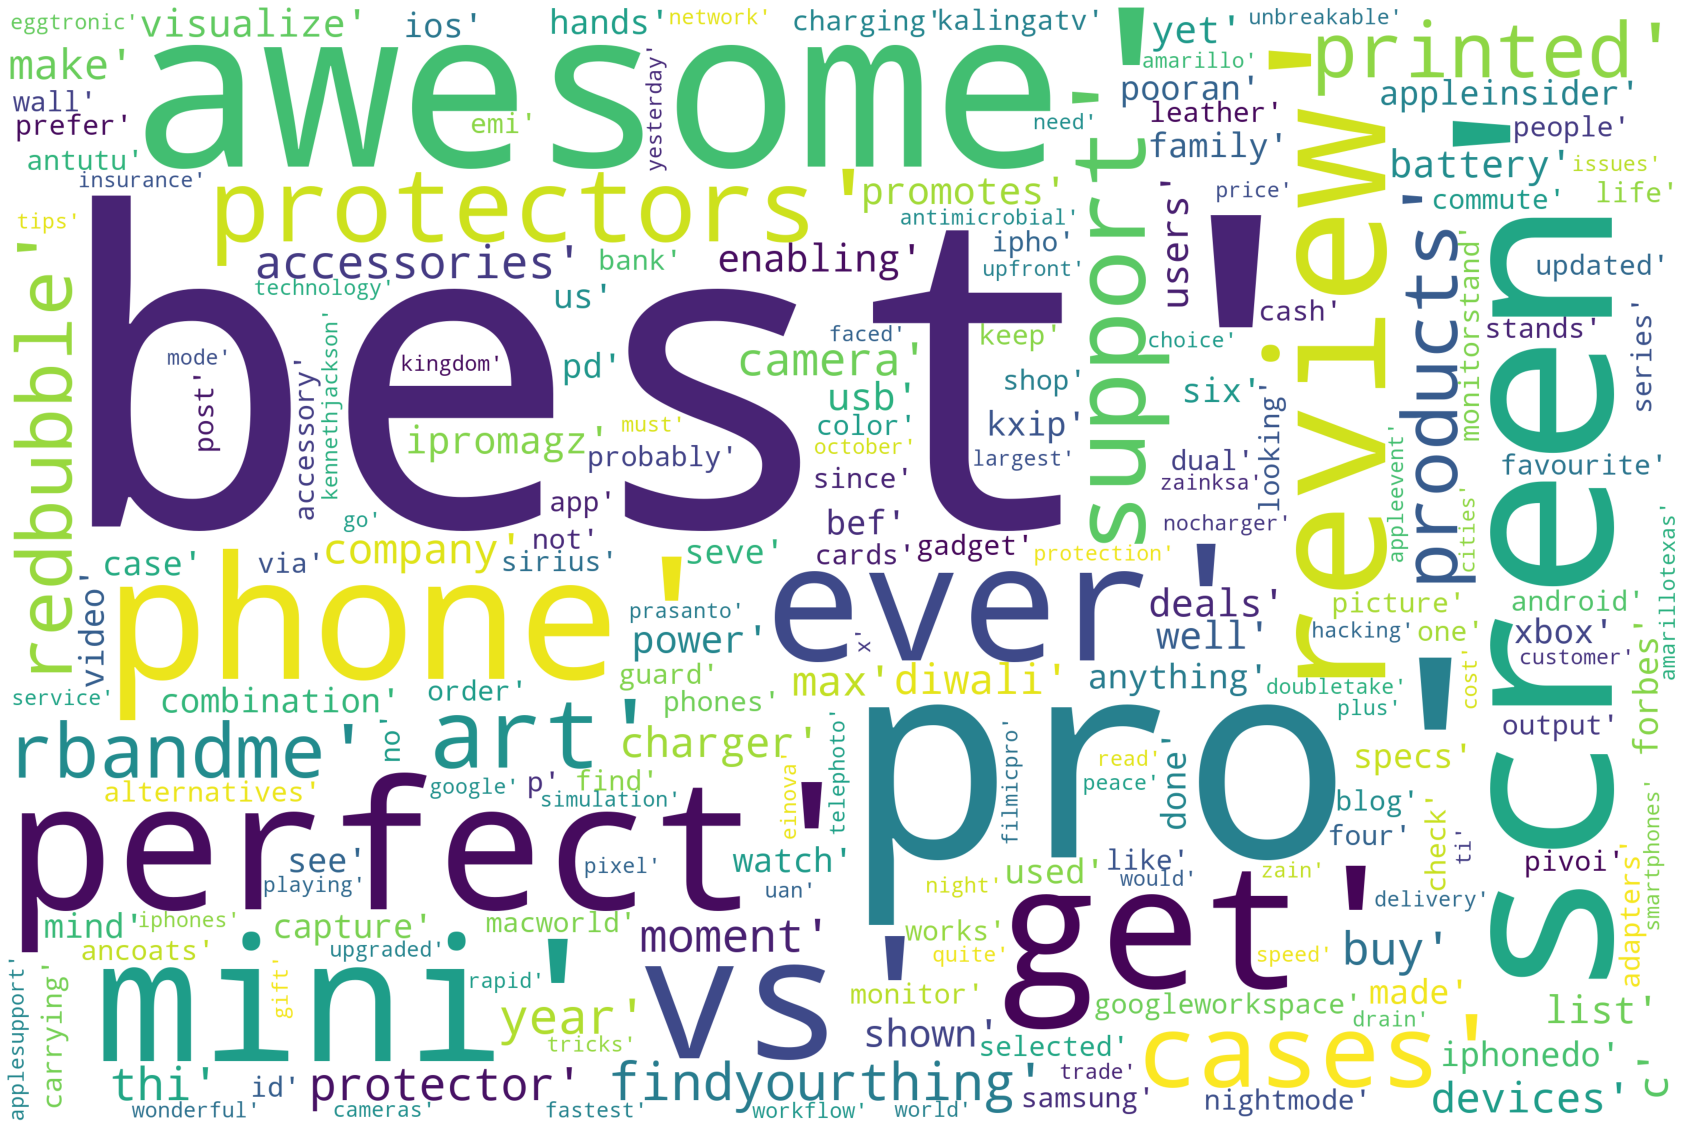

In [79]:
#Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="white" ,collocations=False, stopwords = STOPWORDS).generate(pos_words_str)
# Plot
plot_cloud(wordcloud)
wordcloud.to_file('/Users/shreshthrathod/Downloads/WC_2.png')

In [80]:
df_negative= dataframe.sort_values(by='polarity', ascending=True)[:100]

In [81]:
df_negative["preprocessed_tweet"].head()

7738    bro jus called bew sounded terrible glitching ...
2240        vs pro max camera comparison shocking results
6561                                           worst ever
525     getting cause battery horrible one charger por...
1167    hear think evolving oneplus strategy terrible ...
Name: preprocessed_tweet, dtype: object

In [82]:
Neg_words_in_tweet = [tweet.split() for tweet in df_negative['preprocessed_tweet']]
Neg_words_in_tweet

[['bro',
  'jus',
  'called',
  'bew',
  'sounded',
  'terrible',
  'glitching',
  'everything',
  'smfh'],
 ['vs', 'pro', 'max', 'camera', 'comparison', 'shocking', 'results'],
 ['worst', 'ever'],
 ['getting', 'cause', 'battery', 'horrible', 'one', 'charger', 'port', 'done'],
 ['hear',
  'think',
  'evolving',
  'oneplus',
  'strategy',
  'terrible',
  'take',
  'micromax',
  'w'],
 ['amazon',
  'pathetic',
  'way',
  'handled',
  'pre',
  'orders',
  'sales',
  'time',
  'variants'],
 ['vs', 'pro', 'max', 'camera', 'comparison', 'shocking', 'results'],
 ['horrible', 'omg'],
 ['modi',
  'facing',
  'terrible',
  'consequences',
  'mistake',
  'farmers',
  'sfj',
  'believes',
  'ballot',
  'not',
  'bullet',
  'support'],
 ['camera', 'quality', 'pro', 'looks', 'insane'],
 ['freedommobile',
  'worst',
  'experience',
  'freedom',
  'app',
  'web',
  'store',
  'platform',
  'buying',
  'pay',
  'online'],
 ['vs', 'pro', 'max', 'camera', 'comparison', 'shocking', 'results'],
 ['horrible

In [83]:
# List of all words across tweets
neg_words = list(itertools.chain(*Neg_words_in_tweet))

# Create counter
counts_neg_words = collections.Counter(neg_words)

counts_neg_words.most_common(100)

[('bad', 20),
 ('terrible', 12),
 ('camera', 12),
 ('charger', 11),
 ('crap', 11),
 ('horrible', 10),
 ('one', 10),
 ('buy', 10),
 ('no', 9),
 ('not', 8),
 ('hate', 8),
 ('pro', 7),
 ('ugly', 7),
 ('shocking', 6),
 ('results', 6),
 ('life', 6),
 ('money', 6),
 ('removing', 6),
 ('vs', 5),
 ('max', 5),
 ('comparison', 5),
 ('battery', 5),
 ('think', 5),
 ('looks', 5),
 ('real', 5),
 ('really', 5),
 ('please', 5),
 ('give', 5),
 ('kidney', 5),
 ('want', 5),
 ('annoying', 5),
 ('disappointed', 5),
 ('see', 5),
 ('getting', 4),
 ('cause', 4),
 ('port', 4),
 ('done', 4),
 ('hear', 4),
 ('evolving', 4),
 ('oneplus', 4),
 ('strategy', 4),
 ('take', 4),
 ('micromax', 4),
 ('w', 4),
 ('sales', 4),
 ('like', 4),
 ('base', 4),
 ('even', 4),
 ('nylalibra', 4),
 ('dont', 4),
 ('tell', 4),
 ('good', 4),
 ('week', 4),
 ('macbookpro', 4),
 ('cybersecurity', 4),
 ('mad', 4),
 ('environment', 4),
 ('worst', 3),
 ('amazon', 3),
 ('pathetic', 3),
 ('way', 3),
 ('handled', 3),
 ('pre', 3),
 ('orders', 3),


In [84]:
neg_words_str=str(neg_words)

In [85]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

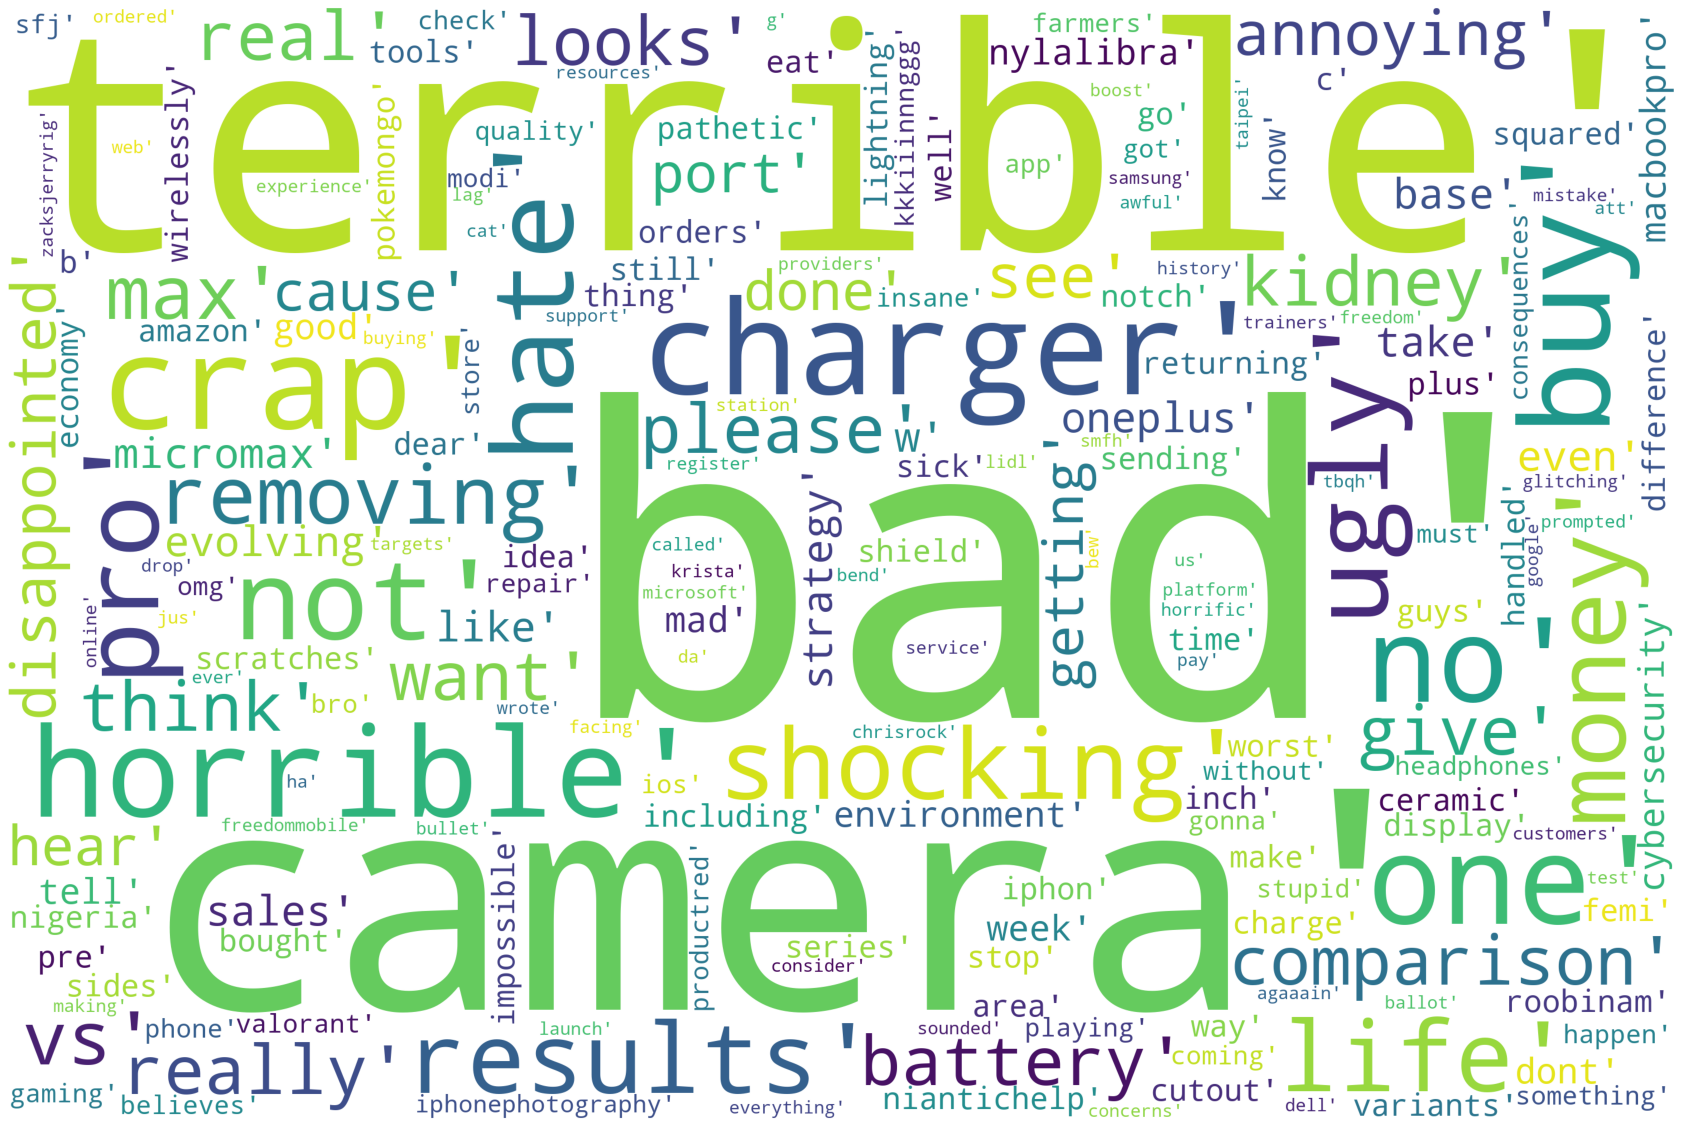

In [86]:
#Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="white" ,collocations=False, stopwords = STOPWORDS).generate(neg_words_str)
# Plot
plot_cloud(wordcloud)
wordcloud.to_file('/Users/shreshthrathod/Downloads/WC_3.png')

In [87]:
Aspect_df=dataframe[["tweet_id","tweet"]]

In [88]:
Aspect_df.head()

tweet_id                                              tweet
0  1323734034086723585  Check out our #Youtube channel! We just upload...
1  1323733110773719048  I am so obsessed. #iPhone12 https://t.co/7g0or...
2  1323732826546671618          Iphone12 ❤️❤️❤️❤️ https://t.co/0NUXV1GhbO
3  1323732460639821826  I love my #iphone12 and I’m glad I’m finally o...
4  1323731391381688325  @Akpartiarabic @MhpTbmmGrubu @devapartisi @Gel...

# Clean tweets for Aspect based sentiment Analysis  

In [89]:
#not removing stopwords
from tqdm import tqdm
clean_tweets = []
# tqdm is for printing the status bar
for sentance in tqdm(Aspect_df['tweet'].values):
    sentance = re.sub(r"http\S+", "", sentance) # remove urls from text python: https://stackoverflow.com/a/40823105/4084039
    sentance = BeautifulSoup(sentance, 'lxml').get_text() 
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip() #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)  #remove spacial character: https://stackoverflow.com/a/5843547/4084039
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split())
    clean_tweets.append(sentance.strip())

100%|██████████| 20085/20085 [00:04<00:00, 4552.29it/s]


In [90]:
Aspect_df['clean_tweets']=clean_tweets

In [91]:
Aspect_df.head()

tweet_id                                              tweet  \
0  1323734034086723585  Check out our #Youtube channel! We just upload...   
1  1323733110773719048  I am so obsessed. #iPhone12 https://t.co/7g0or...   
2  1323732826546671618          Iphone12 ❤️❤️❤️❤️ https://t.co/0NUXV1GhbO   
3  1323732460639821826  I love my #iphone12 and I’m glad I’m finally o...   
4  1323731391381688325  @Akpartiarabic @MhpTbmmGrubu @devapartisi @Gel...   

                                        clean_tweets  
0  check out our youtube channel we just uploaded...  
1                                   i am so obsessed  
2                                                     
3      i love my and i m glad i m finally on att lol  
4  akpartiarabic mhptbmmgrubu devapartisi gelecek...

In [92]:
def get_aspects(text):
    doc=nlp(text)
    noun_adj_pairs=[]
    #print([ (c, c.pos_) for c in doc])
    for i,token in enumerate(doc):

        
        ### Extract noun, adjective pairs where adjectives are
        ###  after the noun  (the food was (not) tasty)
        
        if token.pos_ in ('NOUN','PROPN'):
            if i <len(doc)-1 :
                adj=''
                
                for j in range(i+1,len(doc)):
                    
                    if doc[j].text in  ['no', 'not']:  
                        adj += 'not '
    
                    if doc[j].pos_   == 'ADJ':
                        adj += doc[j].text 
                        noun_adj_pairs.append((token.text,adj))
                        break
        
        ### Extract noun, adjective pairs where adjectives are
        ###  before the nouns: noun phrases (the tasty food)
        
        if token.pos_ in ('ADJ'):
            if i <len(doc) -1:
                if doc[i+1].pos_ in ('NOUN'):
                    noun_adj_pairs.append((doc[i+1].text, token.text))
                    break

    return noun_adj_pairs

In [93]:
all_aspects=[]

Aspect_df['aspects']=Aspect_df['clean_tweets'].apply(get_aspects)

In [94]:
Aspect_df.head()

tweet_id                                              tweet  \
0  1323734034086723585  Check out our #Youtube channel! We just upload...   
1  1323733110773719048  I am so obsessed. #iPhone12 https://t.co/7g0or...   
2  1323732826546671618          Iphone12 ❤️❤️❤️❤️ https://t.co/0NUXV1GhbO   
3  1323732460639821826  I love my #iphone12 and I’m glad I’m finally o...   
4  1323731391381688325  @Akpartiarabic @MhpTbmmGrubu @devapartisi @Gel...   

                                        clean_tweets  \
0  check out our youtube channel we just uploaded...   
1                                   i am so obsessed   
2                                                      
3      i love my and i m glad i m finally on att lol   
4  akpartiarabic mhptbmmgrubu devapartisi gelecek...   

                                          aspects  
0  [(youtube, new), (channel, new), (video, new)]  
1                                              []  
2                                              []  
3                                              []  
4                                              []

In [95]:
#dictionary gives key value pair.Key is noun and values is all adjective associated with nouns
from collections import defaultdict

all_aspects=defaultdict(list)

for i, aspect_review in Aspect_df['aspects'].iteritems():
    for aspect in aspect_review:
        all_aspects[aspect[0]].append(aspect[1])

In [96]:
all_aspects

defaultdict(list,
            {'youtube': ['new',
              'amazing',
              'latest',
              'free',
              'free',
              'unbox',
              'more',
              'complete',
              'new',
              'many',
              'quick',
              'cool',
              'latest',
              'new',
              'amazing',
              'latest',
              'free',
              'free',
              'unbox',
              'more',
              'new',
              'latest',
              'new',
              'amazing',
              'latest',
              'more',
              'amazing',
              'amazing',
              'more'],
             'channel': ['new', 'fast', 'quick', 'new', 'new', 'new'],
             'video': ['new',
              'pro',
              'new',
              'new',
              'new',
              'old',
              'pro',
              'old',
              'new',
              'new',
              '

In [97]:
#finding most occeuring nouns
aspect_count=[]
for aspect, sentiment in all_aspects.items():
    aspect_count.append((aspect, len(sentiment)))

In [98]:
aspect_count

[('youtube', 29),
 ('channel', 6),
 ('video', 254),
 ('price', 530),
 ('bargain', 446),
 ('huawei', 32),
 ('lite', 4),
 ('camera', 157),
 ('days', 89),
 ('iphonewallpaper', 4),
 ('beach', 16),
 ('nuthatch', 3),
 ('spaghetticode', 1),
 ('flaw', 1),
 ('apple', 1831),
 ('aapl', 34),
 ('aseries', 1),
 ('chips', 7),
 ('delays', 5),
 ('product', 35),
 ('focus', 32),
 ('amazon', 102),
 ('berkshire', 31),
 ('gpu', 3),
 ('soc', 4),
 ('iphone', 2700),
 ('issues', 48),
 ('battery', 138),
 ('grandma', 2),
 ('i', 29),
 ('m', 29),
 ('bumper', 23),
 ('case', 268),
 ('display', 25),
 ('ifb', 174),
 ('delivery', 35),
 ('home', 31),
 ('screen', 210),
 ('app', 51),
 ('shop', 17),
 ('iface', 1),
 ('reflection', 2),
 ('khaki', 1),
 ('samsung', 60),
 ('phones', 74),
 ('snazzyq', 3),
 ('life', 61),
 ('manufacturers', 3),
 ('fyi', 2),
 ('legislation', 2),
 ('consumers', 10),
 ('devices', 28),
 ('call', 12),
 ('holy', 4),
 ('man', 24),
 ('images', 6),
 ('keyboard', 4),
 ('love', 30),
 ('instagood', 2),
 ('phot

In [99]:
#sort by most occuring nouns
aspect_count.sort(key=lambda x:x[1], reverse=True)
aspect_count

[('iphone', 2700),
 ('apple', 1831),
 ('price', 530),
 ('phone', 447),
 ('bargain', 446),
 ('max', 411),
 ('mini', 323),
 ('case', 268),
 ('brand', 258),
 ('video', 254),
 ('screen', 210),
 ('time', 207),
 ('t', 189),
 ('pro', 182),
 ('ifb', 174),
 ('technicalguruji', 168),
 ('new', 163),
 ('review', 162),
 ('charger', 160),
 ('camera', 157),
 ('battery', 138),
 ('ios', 135),
 ('cases', 133),
 ('series', 128),
 ('tech', 127),
 ('giveaway', 125),
 ('preorders', 123),
 ('magsafe', 122),
 ('verizon', 122),
 ('today', 111),
 ('homepod', 109),
 ('order', 109),
 ('amazon', 102),
 ('week', 102),
 ('people', 101),
 ('thing', 95),
 ('days', 89),
 ('glass', 86),
 ('dome', 85),
 ('armor', 82),
 ('day', 81),
 ('year', 81),
 ('tim', 81),
 ('hands', 79),
 ('cook', 79),
 ('news', 76),
 ('phones', 74),
 ('users', 73),
 ('iphones', 73),
 ('sale', 72),
 ('colour', 72),
 ('bike', 68),
 ('orders', 67),
 ('league', 67),
 ('tmobile', 65),
 ('factory', 65),
 ('things', 64),
 ('page', 64),
 ('smartphone', 63)

In [100]:
all_aspects['iphone']

['quick',
 'beautiful',
 'bloody',
 'best',
 'promotional',
 'old',
 'pro',
 'free',
 'free',
 'pro',
 'same',
 'more',
 'open',
 'pro',
 'amazing',
 'powerful',
 'pro',
 'simple',
 'new',
 'pro',
 'appleevent',
 'appleevent',
 'pro',
 'appleevent',
 'new',
 'magnetic',
 'new',
 'med',
 'new',
 'secret',
 'negative',
 'pro',
 'absurd',
 'available',
 'ok',
 'mini',
 'magsafe',
 'full',
 'full',
 'unlocked',
 'available',
 'impossible',
 'launched',
 'online',
 'online',
 'iphone',
 'pro',
 'small',
 'magsafe',
 'tired',
 'pro',
 'more',
 'resell',
 'anti',
 'big',
 'left',
 'accurate',
 'mini',
 'more',
 'great',
 'slim',
 'pro',
 'rugged',
 'rugged',
 'rich',
 'available',
 'normal',
 'normal',
 'same',
 'upcoming',
 'new',
 'own',
 'honest',
 'excited',
 'new',
 'pro',
 'interested',
 'green',
 'not pink',
 'pink',
 'top',
 'first',
 'maple',
 'superego',
 'not lame',
 'best',
 'pro',
 'true',
 'decent',
 'more',
 'pro',
 'fast',
 'free',
 'latest',
 'pro',
 'pro',
 'not upfront',
 '

In [101]:
TextBlob(' '.join(all_aspects['iphone'])).sentiment

Sentiment(polarity=0.21771047111324812, subjectivity=0.523364715274437)

In [102]:
all_aspects['camera']

['rear',
 'new',
 'stellar',
 'good',
 'impossible',
 'elite',
 'small',
 'same',
 'wireless',
 'front',
 'new',
 'awesome',
 'difficult',
 'best',
 'new',
 'best',
 'live',
 'official',
 'other',
 'full',
 'further',
 'not third',
 'further',
 'better',
 'first',
 'other',
 'white',
 'better',
 'better',
 'more',
 'clear',
 'better',
 'more',
 'amazing',
 'awesome',
 'dslr',
 'dslr',
 'difficult',
 'multiple',
 'new',
 'big',
 'harsh',
 'pro',
 'clear',
 'faster',
 'light',
 'good',
 'pro',
 'additional',
 'low',
 'pro',
 'clear',
 'pro',
 'pro',
 'great',
 'wide',
 'new',
 'better',
 'better',
 'simple',
 'simple',
 'pro',
 'pro',
 'pro',
 'good',
 'better',
 'new',
 'excellent',
 'legit',
 'bigger',
 'great',
 'pro',
 'new',
 'perfect',
 'shocking',
 'genuine',
 'rear',
 'new',
 'stellar',
 'good',
 'impossible',
 'impossible',
 'elite',
 'small',
 'same',
 'front',
 'awesome',
 'difficult',
 'best',
 'new',
 'best',
 'official',
 'full',
 'further',
 'not third',
 'further',
 'bett

In [103]:
TextBlob(' '.join(all_aspects['camera'])).sentiment

Sentiment(polarity=0.11899032340208815, subjectivity=0.5417676161373637)

In [104]:
all_aspects['price']

['fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'reasonable',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fantastic',
 'fan

In [105]:
TextBlob(' '.join(all_aspects['price'])).sentiment

Sentiment(polarity=0.38099366445520577, subjectivity=0.8411732711732658)

In [106]:
all_aspects['battery']

['new',
 'same',
 'new',
 'pro',
 'pro',
 'better',
 'new',
 'tough',
 'horrible',
 'more',
 'decent',
 'best',
 'left',
 'thicker',
 'good',
 'heavy',
 'simple',
 'pro',
 'smart',
 'new',
 'backup',
 'higher',
 'available',
 'available',
 'new',
 'good',
 'linear',
 'last',
 'efficient',
 'rapid',
 'not new',
 'solid',
 'complete',
 'official',
 'more',
 'official',
 'mini',
 'new',
 'faster',
 'final',
 'great',
 'entire',
 'disable',
 'pathetic',
 'appleevent',
 'faster',
 'bad',
 'smaller',
 'smaller',
 'more',
 'extensive',
 'smart',
 'improved',
 'iphone',
 'pro',
 'ver',
 'new',
 'smart',
 'bad',
 'better',
 'new',
 'same',
 'better',
 'new',
 'tough',
 'horrible',
 'more',
 'decent',
 'best',
 'left',
 'thicker',
 'good',
 'heavy',
 'simple',
 'smart',
 'new',
 'backup',
 'higher',
 'available',
 'available',
 'more',
 'extensive',
 'better',
 'tough',
 'decent',
 'smart',
 'long',
 'impressive',
 'undefeated',
 'more',
 'extensive',
 'improved',
 'iphone',
 'pro',
 'new',
 'be

In [107]:
TextBlob(' '.join(all_aspects['battery'])).sentiment

Sentiment(polarity=0.14754346182917608, subjectivity=0.506470830756545)

In [108]:
all_aspects['screen']

['beautiful',
 'appleauthorised',
 'aesthetic',
 'easy',
 'strong',
 'easy',
 'strong',
 'new',
 'huge',
 'easy',
 'easy',
 'limited',
 'slippery',
 'happy',
 'oled',
 'big',
 'easy',
 'available',
 'mobile',
 'strong',
 'mad',
 'mad',
 'easy',
 'strong',
 'easy',
 'easy',
 'new',
 'yellow',
 'easy',
 'screenshot',
 'multi',
 'easy',
 'less',
 'strong',
 'available',
 'broken',
 'easy',
 'strong',
 'excellent',
 'mobile',
 'aesthetic',
 'new',
 'wrong',
 'easy',
 'hard',
 'easy',
 'large',
 'strong',
 'easy',
 'indestructible',
 'pro',
 'amazing',
 'largest',
 'new',
 'free',
 'full',
 'easy',
 'strong',
 'aesthetic',
 'pacific',
 'pro',
 'pro',
 'new',
 'pro',
 'strong',
 'easy',
 'broken',
 'strong',
 'broken',
 'able',
 'green',
 'free',
 'pro',
 'pro',
 'original',
 'strong',
 'available',
 'easy',
 'strong',
 'bigger',
 'mobile',
 'yellow',
 'beautiful',
 'easy',
 'strong',
 'easy',
 'strong',
 'new',
 'easy',
 'easy',
 'limited',
 'slippery',
 'happy',
 'oled',
 'big',
 'easy',
 

In [109]:
TextBlob(' '.join(all_aspects['screen'])).sentiment

Sentiment(polarity=0.3349216597796133, subjectivity=0.7195868998425813)

In [110]:
all_aspects['charger']

['old',
 'wireless',
 'worth',
 'wireless',
 'mini',
 'new',
 'new',
 'lame',
 'small',
 'fast',
 'powerdrive',
 'compatible',
 'good',
 'new',
 'favorite',
 'new',
 'new',
 'fast',
 'own',
 'new',
 'new',
 'expensive',
 'second',
 'light',
 'open',
 'big',
 'new',
 'foldable',
 'new',
 'appleevent',
 'less',
 'wireless',
 'original',
 'not best',
 'able',
 'red',
 'more',
 'own',
 'fast',
 'new',
 'confusing',
 'not new',
 'only',
 'bare',
 'correct',
 'new',
 'social',
 'social',
 'social',
 'amazed',
 'wireless',
 'major',
 'new',
 'wireless',
 'best',
 'ugreen',
 'new',
 'environmentallyconscious',
 'stupid',
 'new',
 'same',
 'quick',
 'remote',
 'stupid',
 'fine',
 'wireless',
 'free',
 'new',
 'portable',
 'honest',
 'bad',
 'bad',
 'not not delive',
 'cheap',
 'higher',
 'not fast',
 'loose',
 'unique',
 'wireless',
 'wireless',
 'better',
 'handfree',
 'mag',
 'fast',
 'fast',
 'fast',
 'fast',
 'wireless',
 'powerdrive',
 'durable',
 'fast',
 'best',
 'best',
 'old',
 'wirele

In [111]:
TextBlob(' '.join(all_aspects['charger'])).sentiment

Sentiment(polarity=0.11491615424805082, subjectivity=0.5118298368298368)

Gaurav Chaudhary, known professionally as Technical Guruji, is an Indian YouTube Personality based in UAE. Gaurav is notable for producing YouTube videos concerning technology in Hindi

In [112]:
all_aspects['technicalguruji']

['lucky',
 'impressed',
 'huge',
 'last',
 'last',
 'upsc',
 'not enough',
 'first',
 'social',
 'first',
 'plzz',
 'nice',
 'new',
 'about',
 'gauravchaudhary',
 'big',
 'new',
 'big',
 'big',
 'many',
 'happy',
 'black',
 'favourite',
 'total',
 'red',
 'poor',
 'amazing',
 'not not other',
 'grateful',
 'ready',
 'awesome',
 'coloured',
 'happy',
 'amazing',
 'latest',
 'mega',
 'huge',
 'blue',
 'mobile',
 'costly',
 'good',
 'superb',
 'brilliant',
 'brilliant',
 'good',
 'favorite',
 'greatest',
 'much',
 'iphon',
 'best',
 'green',
 'congratulat',
 'congratulat',
 'lovely',
 'amazing',
 'awesome',
 'very',
 'nice',
 'intereste',
 'right',
 'complete',
 'white',
 'black',
 'black',
 'black',
 'black',
 'red',
 'beautiful',
 'grand',
 'red',
 'big',
 'big',
 'new',
 'excited',
 'more',
 'more',
 'beautiful',
 'new',
 'awesome',
 'technical',
 'amazing',
 'awesome',
 'favourite',
 'amazing',
 'amazing',
 'amazing',
 'favorite',
 'mainstream',
 'favourite',
 'mainstream',
 'great',


In [113]:
TextBlob(' '.join(all_aspects['technicalguruji'])).sentiment

Sentiment(polarity=0.406415232054767, subjectivity=0.5631153729990938)

In [ ]:
all_aspects['ios']

In [ ]:
TextBlob(' '.join(all_aspects['ios'])).sentiment

In [ ]:
all_aspects['video']

In [ ]:
TextBlob(' '.join(all_aspects['video'])).sentiment

In [ ]:
all_aspects['design']

In [ ]:
TextBlob(' '.join(all_aspects['design'])).sentiment

In [ ]:
all_aspects['price']

In [ ]:
len(dataframe['preprocessed_tweet'].iloc[67].split())

In [ ]:
len(dataframe['preprocessed_tweet'].iloc[67])

In [ ]:
dataframe['preprocessed_tweet'].iloc[67]